In [1]:
import pandas as pd 
import os

df=pd.read_csv('/media/stanley/SHARED/Internships/IITK Oswald sir/IVF/Codes/Dataset/cleaned1.csv')
df.info()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375298 entries, 0 to 375297
Data columns (total 46 columns):
 #   Column                                                          Non-Null Count   Dtype
---  ------                                                          --------------   -----
 0   Unnamed: 0                                                      375298 non-null  int64
 1   Patient Age at Treatment                                        375298 non-null  int64
 2   Total Number of Previous cycles, Both IVF and DI                375298 non-null  int64
 3   Total Number of Previous treatments, Both IVF and DI at clinic  375298 non-null  int64
 4   Total Number of Previous IVF cycles                             375298 non-null  int64
 5   Total number of previous pregnancies, Both IVF and DI           375298 non-null  int64
 6   Total number of IVF pregnancies                                 375298 non-null  int64
 7   Total number of DI pregnancies                          

In [2]:
for col in df.columns:
    print(col, ": ", df[col].unique())

Unnamed: 0 :  [     0      1      2 ... 375295 375296 375297]
Patient Age at Treatment :  [1 3 0 2 4 5]
Total Number of Previous cycles, Both IVF and DI :  [0 2 3 6 4 1 5]
Total Number of Previous treatments, Both IVF and DI at clinic :  [0 2 3 6 1 4 5]
Total Number of Previous IVF cycles :  [0 2 3 6 4 1 5]
Total number of previous pregnancies, Both IVF and DI :  [0 1 4 2 3 6 5]
Total number of IVF pregnancies :  [0 1 4 2 3 6 5]
Total number of DI pregnancies :  [0 1 2 5 3]
Total number of live births - conceived through IVF or DI :  [0 1 2 3 6 4 5]
Total number of live births - conceived through IVF :  [0 1 2 3 4]
Total number of live births - conceived through DI :  [0 1 2 3]
Type of Infertility - Female Primary :  [0 1]
Type of Infertility - Female Secondary :  [0 1]
Type of Infertility - Male Primary :  [0 1]
Type of Infertility - Male Secondary :  [0 1]
Type of Infertility -Couple Primary :  [0 1]
Type of Infertility -Couple Secondary :  [0 1]
Cause  of Infertility - Tubal disease

In [3]:
df

,Unnamed: 0,Patient Age at Treatment,"Total Number of Previous cycles, Both IVF and DI","Total Number of Previous treatments, Both IVF and DI at clinic",Total Number of Previous IVF cycles,"Total number of previous pregnancies, Both IVF and DI",Total number of IVF pregnancies,Total number of DI pregnancies,Total number of live births - conceived through IVF or DI,Total number of live births - conceived through IVF,...,Total Embryos Created,Eggs Micro-injected,Embryos from Eggs Micro-injected,Total Embryos Thawed,Embryos Transfered,Embryos Transfered from Eggs Micro-injected,Embryos (from Eggs Micro-injected) Stored For Use By Patient,Live Birth Occurrence,Number of Live Births,Number of foetal sacs with fetal pulsation
0,0,1,0,0,0,0,0,0,0,0,...,12,0,0,0,2,0,0,0,0,0
1,1,3,2,2,2,0,0,0,0,0,...,48,0,0,0,3,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,1,23,1,0,1,1,0,0,0,0
3,3,2,3,3,3,0,0,0,0,0,...,12,0,0,0,2,0,0,0,0,0
4,4,1,0,0,0,0,0,0,0,0,...,47,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375293,375293,2,0,0,0,0,0,0,0,0,...,2,0,0,0,2,0,0,1,1,1
375294,375294,0,0,0,0,0,0,0,0,0,...,13,0,0,0,1,0,0,1,1,1
375295,375295,0,0,0,0,0,0,0,0,0,...,12,0,0,0,2,0,0,1,1,1
375296,375296,0,1,0,1,1,1,0,1,1,...,34,49,4,0,1,1,0,1,1,1


In [4]:
y = df['Live Birth Occurrence']
X = df.drop('Live Birth Occurrence', axis=1)

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375298 entries, 0 to 375297
Data columns (total 45 columns):
 #   Column                                                          Non-Null Count   Dtype
---  ------                                                          --------------   -----
 0   Unnamed: 0                                                      375298 non-null  int64
 1   Patient Age at Treatment                                        375298 non-null  int64
 2   Total Number of Previous cycles, Both IVF and DI                375298 non-null  int64
 3   Total Number of Previous treatments, Both IVF and DI at clinic  375298 non-null  int64
 4   Total Number of Previous IVF cycles                             375298 non-null  int64
 5   Total number of previous pregnancies, Both IVF and DI           375298 non-null  int64
 6   Total number of IVF pregnancies                                 375298 non-null  int64
 7   Total number of DI pregnancies                          

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [6]:
from sklearn.model_selection import RandomizedSearchCV

parameters = {'max_depth' : (3,5,7,9,10,15,20,25)
              , 'criterion' : ('gini', 'entropy')
              , 'max_features' : ( 'sqrt', 'log2')
              , 'min_samples_split' : (2,4,6)
             }

DT_grid  = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions = parameters, cv = 5, verbose = True)

DT_grid.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ('gini', 'entropy'),
                                        'max_depth': (3, 5, 7, 9, 10, 15, 20,
                                                      25),
                                        'max_features': ('sqrt', 'log2'),
                                        'min_samples_split': (2, 4, 6)},
                   verbose=True)

In [7]:
DT_grid.best_estimator_


DecisionTreeClassifier(max_depth=20, max_features='sqrt')

In [8]:
DT_Model = DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features='sqrt',min_samples_split=6)
DT_Model.fit(X_train,y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=25, max_features='sqrt',
                       min_samples_split=6)

In [9]:
print (f'Train Accuracy - : {DT_Model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {DT_Model.score(X_test,y_test):.3f}')

Train Accuracy - : 1.000
Test Accuracy - : 1.000


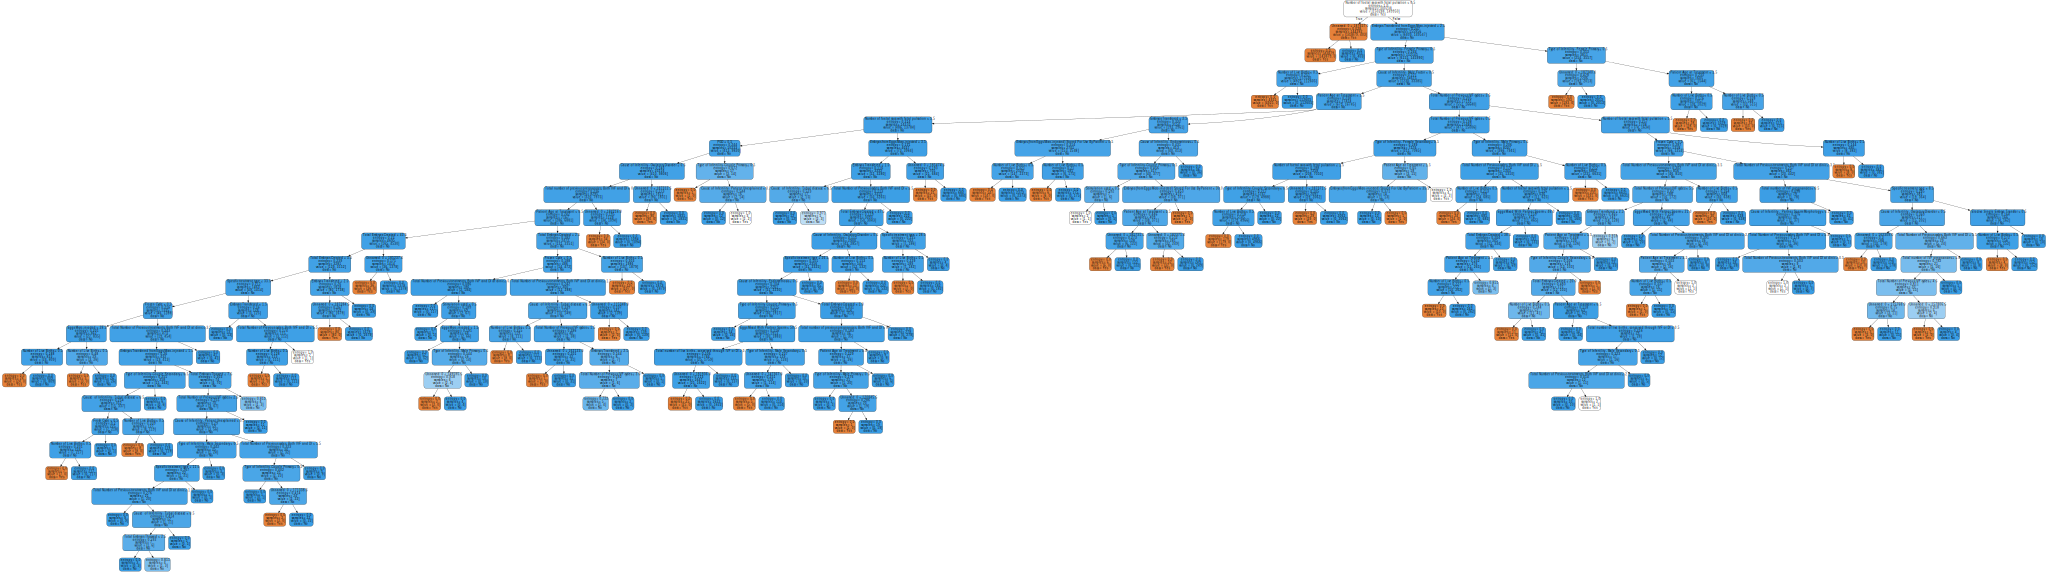

In [10]:
dot_data = export_graphviz(DT_Model,   
                      out_file=None, 
                      feature_names=X.columns,       #Provide X Variables Column Names 
                      class_names=['Yes','No'],      # Provide Target Variable Column Name
                      filled=True, rounded=True,     # Controls the look of the nodes and colours it
                      special_characters=True)  

graph = graphviz.Source(dot_data)
# graph.render('pic',format='png', view=False)
graph.render('pic', format='png',view=False)

graph